# Netflix EDA

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style()


2.2.2


In [2]:
data = pd.read_csv('./netflix_titles.csv', encoding='iso-8859-1')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding the Data

In [3]:
data.shape

(8809, 26)

In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
# Columns from index 12 and afterwards are all Unnamed and Blank columns, so we have removed them in beginning.
data.drop(data.columns[12:], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [7]:
data.describe(exclude='number').T

,count,unique,top,freq
show_id,8809,8809,s1,1
type,8809,2,Movie,6132
title,8809,8806,22-Jul,2
director,6175,4529,Rajiv Chilaka,19
cast,7984,7694,David Attenborough,19
country,7978,748,United States,2819
date_added,8799,1768,"January 1, 2020",109
rating,8805,18,TV-MA,3208
duration,8806,220,1 Season,1794
listed_in,8809,516,"Dramas, International Movies",362


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8809.0,2014.181292,8.818932,1925.0,2013.0,2017.0,2019.0,2024.0


## Data Preprocessing

### Missing Values

In [9]:
data.isnull().sum()/len(data)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.901237
cast             9.365422
country          9.433534
date_added       0.113520
release_year     0.000000
rating           0.045408
duration         0.034056
listed_in        0.000000
description      0.000000
dtype: float64

*We will first fill missing values of Director, Cast, and Country column with 'Unknown' as it is just not correct to remove them or checking each values over internet.*

In [10]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)

In [11]:
a = data[data['date_added'].isnull() == True]['release_year'].values

for i in range(10):
    np.random.seed(42)
    data['date_added'].fillna(str(a[i]) + '-' + str(np.random.randint(1,12 )) + '-' + str(np.random.randint(1,28)), inplace=True)

In [12]:
val = ['R','TV-MA', 'TV-MA', 'R']
for i in range(data['rating'].isnull().sum()):
    data['rating'].fillna(val[i], inplace=True)

In [13]:
val = ['74 min', '84 min', '66 min']
data[data['duration'].isnull()]['rating'] = 'PG-13'

for i in range(data['duration'].isnull().sum()):
    data['duration'].fillna(val[i], inplace=True)

In [14]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Data Transformation

In [15]:
data['date_added'] = pd.to_datetime(data['date_added'], format='mixed')
data['year_added'] = data['date_added'].dt.year

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8809 non-null   object        
 1   type          8809 non-null   object        
 2   title         8809 non-null   object        
 3   director      8809 non-null   object        
 4   cast          8809 non-null   object        
 5   country       8809 non-null   object        
 6   date_added    8809 non-null   datetime64[ns]
 7   release_year  8809 non-null   int64         
 8   rating        8809 non-null   object        
 9   duration      8809 non-null   object        
 10  listed_in     8809 non-null   object        
 11  description   8809 non-null   object        
 12  year_added    8809 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 860.4+ KB


## Data Visualization

In [17]:
def countplot(col, label, title, rotation=0, size=(12,6)):
    plt.figure(figsize=size)
    plt.title(title, fontsize=20)
    ax = sns.countplot(x=data[col], palette='viridis')
    ax.set_xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    ax.set_ylabel('Count', fontsize=16)
    for lab in ax.containers:
        ax.bar_label(lab)

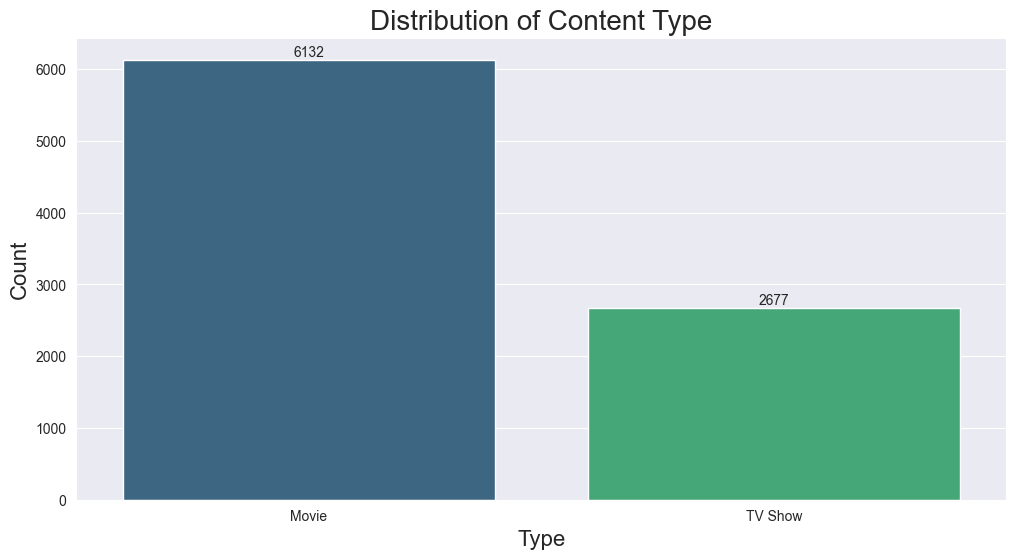

In [18]:
countplot('type', 'Type', 'Distribution of Content Type')

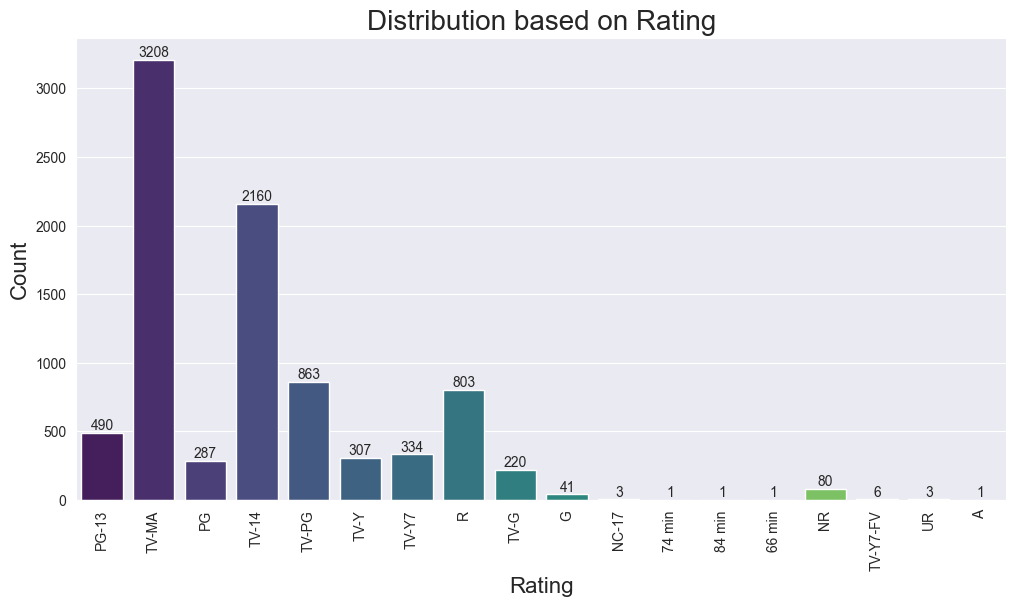

In [19]:
countplot('rating', 'Rating', 'Distribution based on Rating', rotation=90)

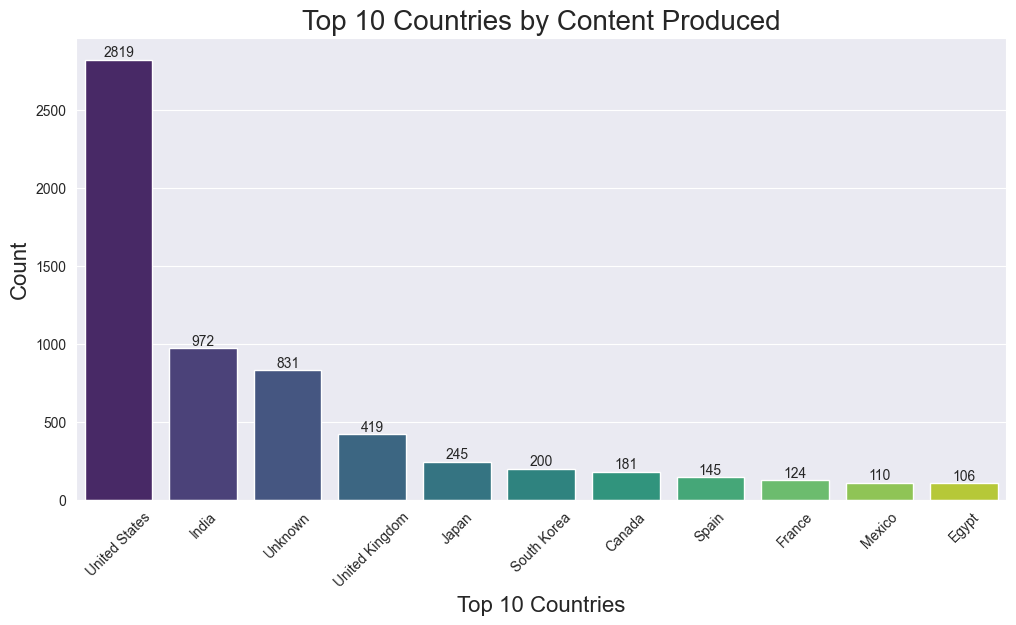

In [20]:
top_10_country = data['country'].value_counts().head(11)
top_10_country.drop('Unknown')
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries by Content Produced', fontsize=20)
ax = sns.barplot(x=top_10_country.index, y=top_10_country, palette='viridis')
plt.xlabel('Top 10 Countries', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

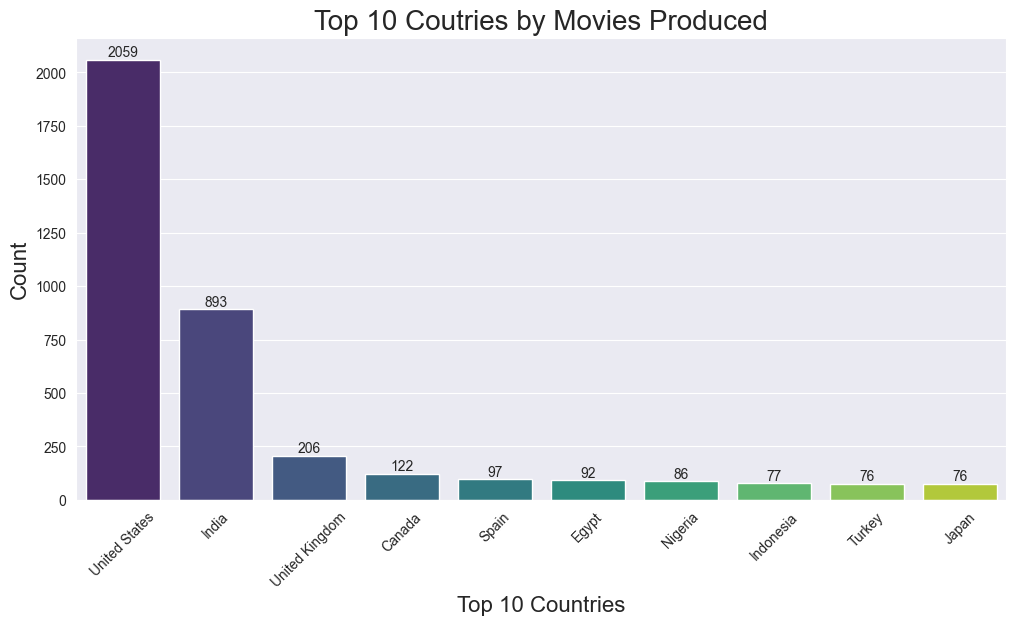

In [21]:
top_10_country = data[data['type'] == 'Movie']['country'].value_counts().head(11)
top_10_country = top_10_country.drop('Unknown')
plt.figure(figsize=(12,6))
plt.title('Top 10 Coutries by Movies Produced', fontsize=20)
ax = sns.barplot(x=top_10_country.index, y=top_10_country, palette='viridis')
plt.xlabel('Top 10 Countries', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

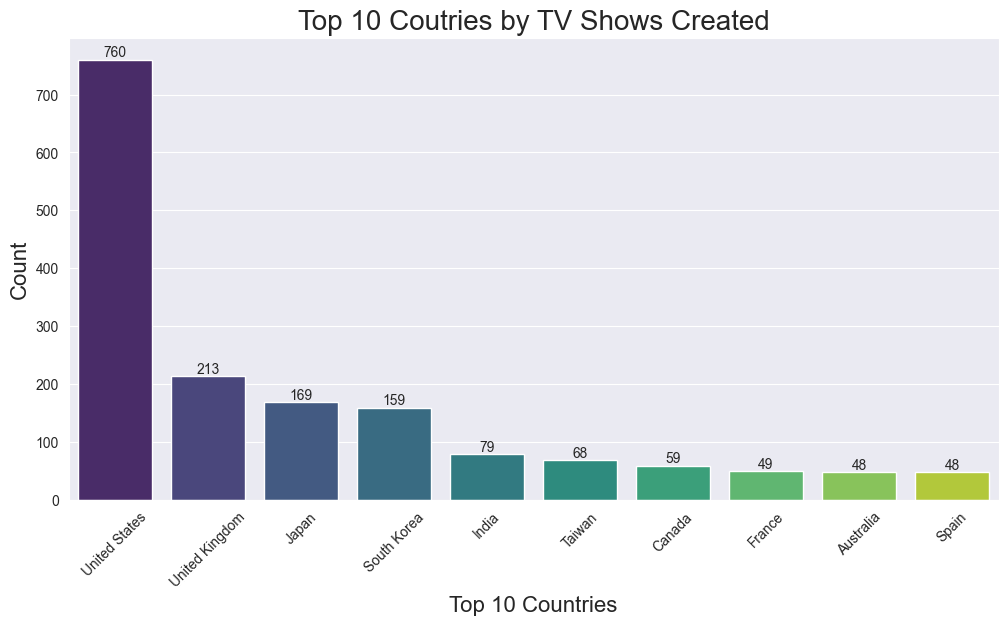

In [22]:
top_10_country = data[data['type'] == 'TV Show']['country'].value_counts().head(11)
top_10_country = top_10_country.drop('Unknown')
plt.figure(figsize=(12,6))
plt.title('Top 10 Coutries by TV Shows Created', fontsize=20)
ax = sns.barplot(x=top_10_country.index, y=top_10_country, palette='viridis')
plt.xlabel('Top 10 Countries', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

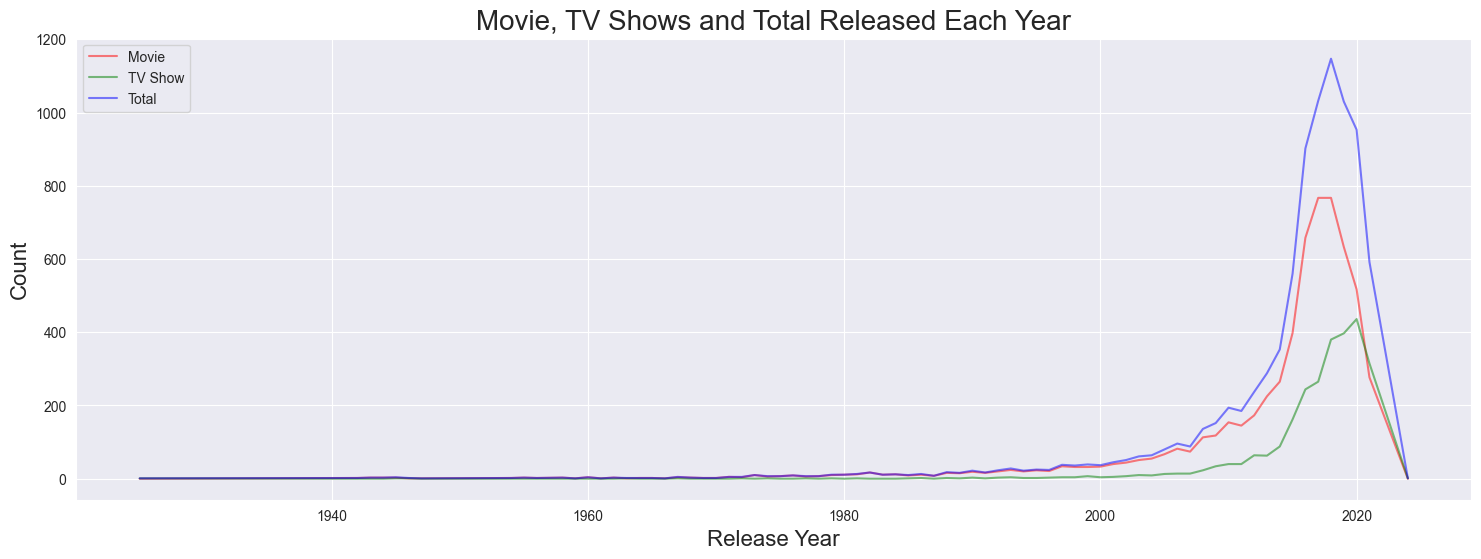

In [23]:
content_type = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_type['Total'] = content_type['Movie'] + content_type['TV Show']
content_type = content_type.reset_index()

plt.figure(figsize=(18,6))
plt.title('Movie, TV Shows and Total Released Each Year', fontsize=20)
plt.plot(content_type['release_year'], content_type['Movie'], label='Movie', color='r', alpha=0.5)
plt.plot(content_type['release_year'], content_type['TV Show'], label='TV Show', color='g', alpha=0.5)
plt.plot(content_type['release_year'], content_type['Total'], label='Total', color='b', alpha=0.5)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper left')

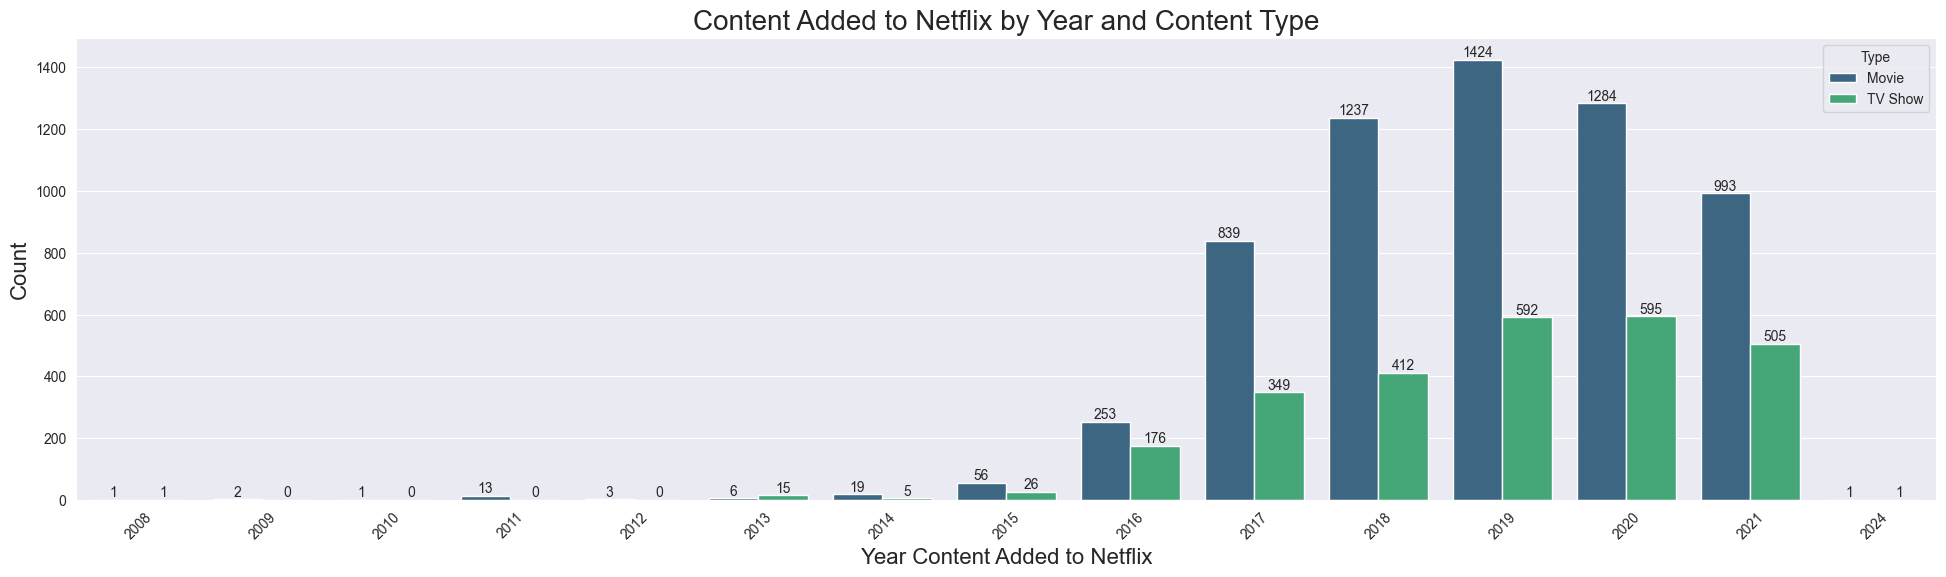

In [24]:
shows_added = data.groupby(['year_added', 'type']).size().unstack(fill_value=0)
shows_added = shows_added.reset_index()
shows_added = shows_added.melt(id_vars='year_added', var_name='Type', value_name='Count')

plt.figure(figsize=(24,6))
plt.title('Content Added to Netflix by Year and Content Type', fontsize=20)
ax = sns.barplot(x=shows_added['year_added'], y=shows_added['Count'], hue=shows_added['Type'], palette='viridis')
plt.xlabel('Year Content Added to Netflix', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

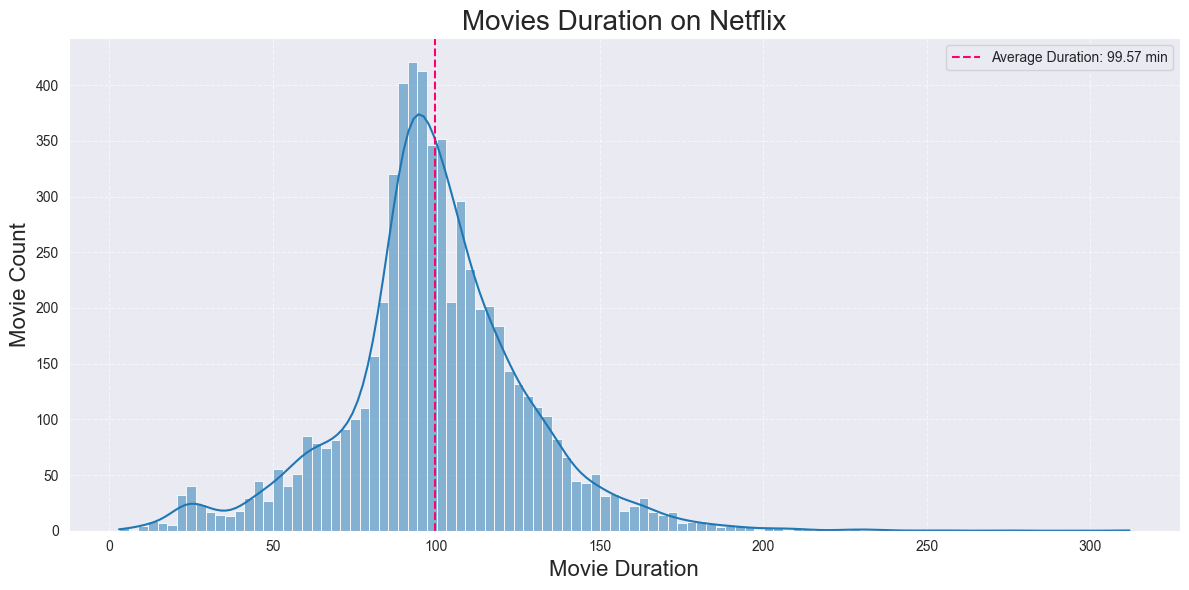

In [25]:
movies = data[data['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)
avg_duration = round(np.mean(movies['duration']),2)

plt.figure(figsize=(12,6))
plt.title('Movies Duration on Netflix', fontsize=20)
sns.histplot(movies['duration'], kde=True)
plt.axvline(x=avg_duration, color='#ff006e', linestyle='--', label=f'Average Duration: {avg_duration:.2f} min')
plt.xlabel('Movie Duration', fontsize=16)
plt.ylabel('Movie Count', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

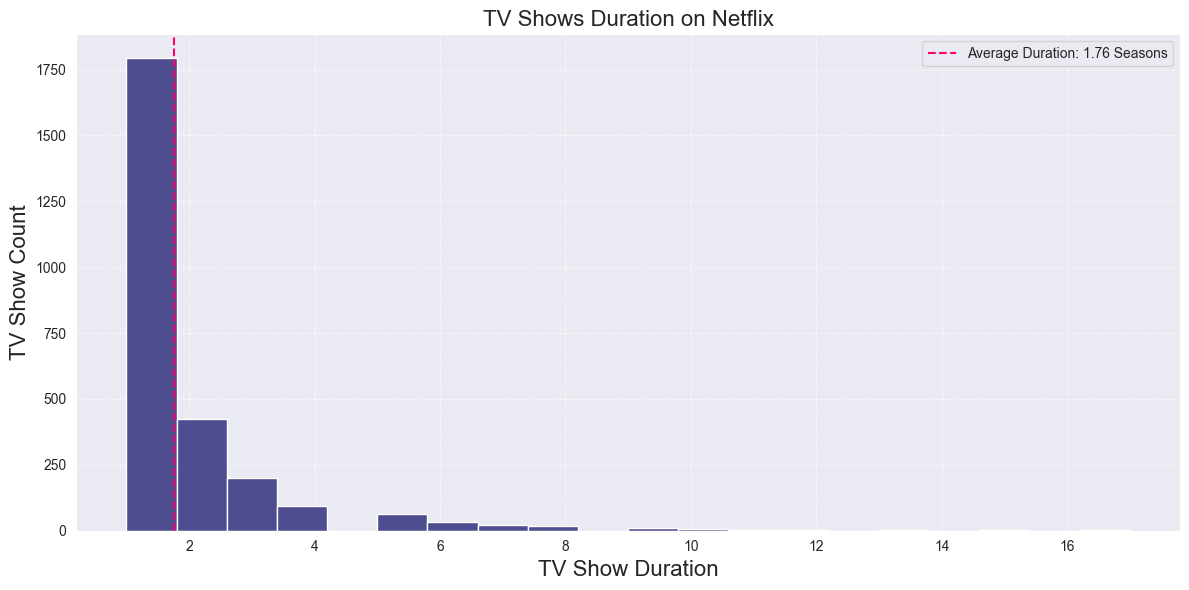

In [26]:
shows = data[data['type'] == 'TV Show']
shows['duration'] = shows['duration'].str.extract('(\d+)').astype(int)
avg_show_duration = round(np.mean(shows['duration']),2)

plt.figure(figsize=(12,6))
plt.title('TV Shows Duration on Netflix', fontsize=16)
sns.histplot(shows['duration'], bins=20 , color='midnightblue')
plt.axvline(x=avg_show_duration, color='#ff006e', linestyle='--', label=f'Average Duration: {avg_show_duration:.2f} Seasons')
plt.xlabel('TV Show Duration', fontsize=16)
plt.ylabel('TV Show Count', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

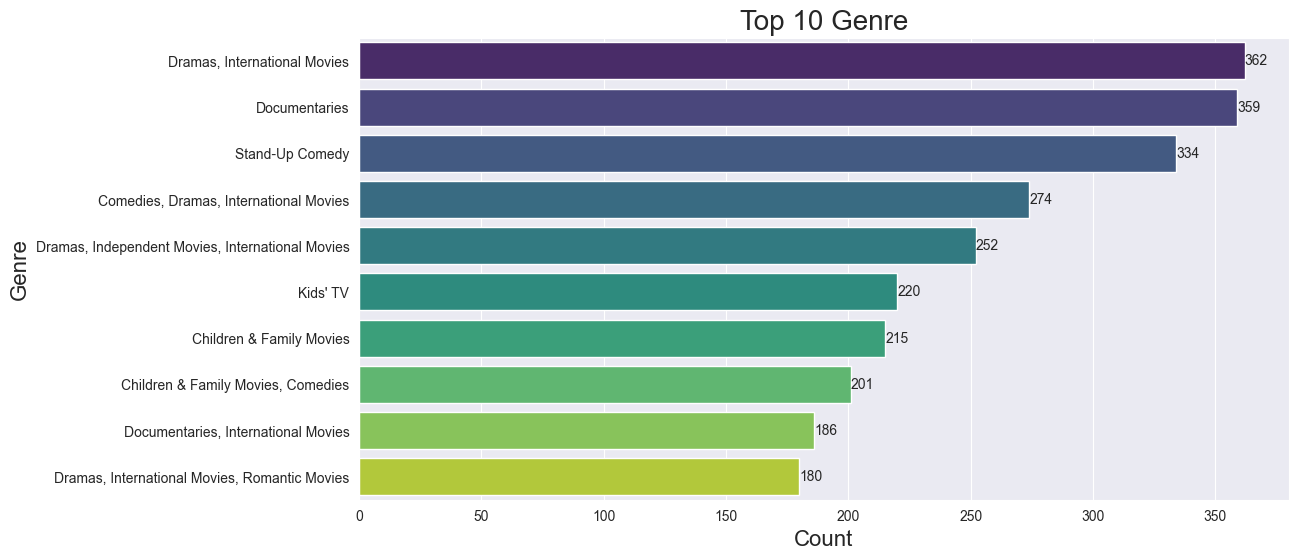

In [27]:
top_genre = data['listed_in'].value_counts().head(10)

plt.figure(figsize=(12,6))
plt.title('Top 10 Genre', fontsize=20)
ax = sns.barplot(y=top_genre.index, x=top_genre, palette='viridis')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genre', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

## Report

1. The dataset has 8809 rows and 26 columns of data. Out of those 26 columns 14 are totally blank and unncessary for the analysis. So we have removed them first.

2. Now we have 12 columns which has one `integer` and rest are `object/string` type.

3. We do have a lot of missing values in the dataset.

    a. Director has 30% data missing which have been filled with 'Unknown'.

    b. Cast and Country has 9% data missing which is also replaced by 'Unknown'.

    c. Date Added has 0.12% data missing which I have filled using a combination of `release_year` for year and random values for month and date.

    d. Rating has only 4 missing values which is filled as per the type of mode value of the content they are.
    
    e. Duration has 3 missing values and those are misplaced in `rating` column so I've taken those from rating fill in duration and then also fill the rating column.
4. We have `date_added` column has object data type so I converted it into datetime data type. After that I've created a column `year_added` from the date_added column.
5. The content type on Netflix data is more on Movies side, which is more than double of TV Shows.
6. Our top movie rating is 'R' with 799 movies and 'TV-MA' for tv shows with 3208 shows under the rating.
7. USA is our top country in content production with India being on second postion, but the difference is very high or almost 3 times of content produced from India on netflix.
8. Breaking down further India is second country from Netflix adopt movies but UK becomes second for TV-show adoption, while USA keeps its position for both Movies and TV-shows.
9. We have data for content from release year of 1940 but the most of the movies adopted by netflix released after 1990, whereas tv-shows adoption comes in trend after 2005.
10. The highest content adopted by netflix comes from 2019. In that year netflix adopted 1424 movies and 592 tv-shows.
11. Most of the movies on netflix have a duration between 70 min to 120 min but the avearge of movie duration is 100 min.
12. TV-shows comes in seasons and they are maximum 1 season long but we do have 17 seasons long tv-show too.
13. Drams & Internation Movies, Documentary, and Stand Up Comedy are top three genres which have more than 300 content under its belt.

***This concludes our report on Netflix Exploratory Data Analysis. Please upvote the notebook and if you have any suggestion or question please let me know.***